In [71]:
from typing import List
import numpy as np

# Channel params
TAO = 2
# Number of messsages
MESSAGES = 20

# Reverse channel error probability
P_reverse = 0

# Start / stop value for probability
P_START = 0.5
P_END = 0.6

# Accuracy of modulation
ACCURACY = 0.1

# Init channel class
class Channel:
    def __init__(self, number: int):
        self.number = number
        self.status = True
        self.message = None
        self.buffer: List[int] = []
        

# Find number of tests
N = 9 / (4 * ACCURACY**2)

# Probability values
P_arr = np.arange(P_START, P_END, (P_END - P_START) / N)
P_arr = np.arange(P_START, P_END, 0.1)


In [103]:
import numpy as np


# Modulation of channel
for p in P_arr:

    # Virtual channels
    virtual_channels = [Channel(number) for number in range(TAO + 1)]
    last_finished_message = -1

    # Init timer
    t = 0
    # Init messages list
    message = list(np.arange(MESSAGES))
    # Buffers for virtual channels
    buffers = [[] for _ in range(TAO + 1)]

    print("=================================")

    while len(message) > 0:
        # Передача сообщения в каждый виртуальный канал
        for channel in virtual_channels:
            if len(message) > 0:
                # print(f'Send {message[0]}, t : {t}, messages: {message[1:]}')
                channel.message = message.pop(0)

        # Time add for sending message
        t += 1

        for channel in virtual_channels:
            # Вероятность ошибки в канале
            if np.random.random() > p:
                # Вероятность ошибки в обратном канале
                if np.random.random() > P_reverse:
                    # Успешно полученное сообщение добавить в буфер канала
                    channel.buffer.insert(0, channel.message)
                    channel.status = True
                    print(
                        f"Channel {channel.number}: ({channel.message}: +; buffer: {channel.buffer})"
                    )

                else:
                    # Событие при ошибки в обратном канале
                    pass

            else:
                # Событие при ошибки в канале
                message.insert(TAO + 1 + channel.number, channel.message)
                print(
                    f"Channel {channel.number}: ({channel.message}: -; buffer: {channel.buffer})"
                )
                channel.status = False

        # Проверка буферов и отправка сообщений на верхний уровень
        total_buffer = []
        for channel in virtual_channels:
            total_buffer.extend(channel.buffer)
        total_buffer.sort()
        messages_to_remove = []

        print(total_buffer)

        if len(total_buffer) > 0:
            for i in range(1, len(total_buffer) + 1):
                sres_total_buffer = total_buffer[:i]
                print(min(sres_total_buffer))

                if (max(sres_total_buffer) - min(sres_total_buffer)) == (
                    len(sres_total_buffer)
                ) - 1:
                    messages_to_remove = sres_total_buffer
                    last_finished_message = min(messages_to_remove)
                    print(f"FF: {messages_to_remove}; LAST: {last_finished_message}")

        last_finished_message = messages_to_remove and max(messages_to_remove)

        for channel in virtual_channels:
            for item in messages_to_remove:
                if item in channel.buffer:
                    channel.buffer.remove(item)

        print("=================================")
        for channel in virtual_channels:
            print(f"Ch: {channel.number}; Buf: {channel.buffer}")
        print("========================================")
        print(f"<<<< Time: {t}")

Channel 0: (0: +; buffer: [0])
Channel 1: (1: +; buffer: [1])
Channel 2: (2: +; buffer: [2])
[0, 1, 2]
0
FF: [0]; LAST: 0
0
FF: [0, 1]; LAST: 0
0
FF: [0, 1, 2]; LAST: 0
Ch: 0; Buf: []
Ch: 1; Buf: []
Ch: 2; Buf: []
<<<< Time: 1
Channel 0: (3: -; buffer: [])
Channel 1: (4: +; buffer: [4])
Channel 2: (5: -; buffer: [])
[4]
4
FF: [4]; LAST: 4
Ch: 0; Buf: []
Ch: 1; Buf: []
Ch: 2; Buf: []
<<<< Time: 2
Channel 0: (6: +; buffer: [6])
Channel 1: (7: -; buffer: [])
Channel 2: (8: -; buffer: [])
[6]
6
FF: [6]; LAST: 6
Ch: 0; Buf: []
Ch: 1; Buf: []
Ch: 2; Buf: []
<<<< Time: 3
Channel 0: (3: +; buffer: [3])
Channel 1: (9: -; buffer: [])
Channel 2: (5: +; buffer: [5])
[3, 5]
3
FF: [3]; LAST: 3
3
Ch: 0; Buf: []
Ch: 1; Buf: []
Ch: 2; Buf: [5]
<<<< Time: 4
Channel 0: (10: -; buffer: [])
Channel 1: (7: +; buffer: [7])
Channel 2: (8: +; buffer: [8, 5])
[5, 7, 8]
5
FF: [5]; LAST: 5
5
5
Ch: 0; Buf: []
Ch: 1; Buf: [7]
Ch: 2; Buf: [8]
<<<< Time: 5
Channel 0: (11: +; buffer: [11])
Channel 1: (9: -; buffer: [7

ValueError: max() arg is an empty sequence

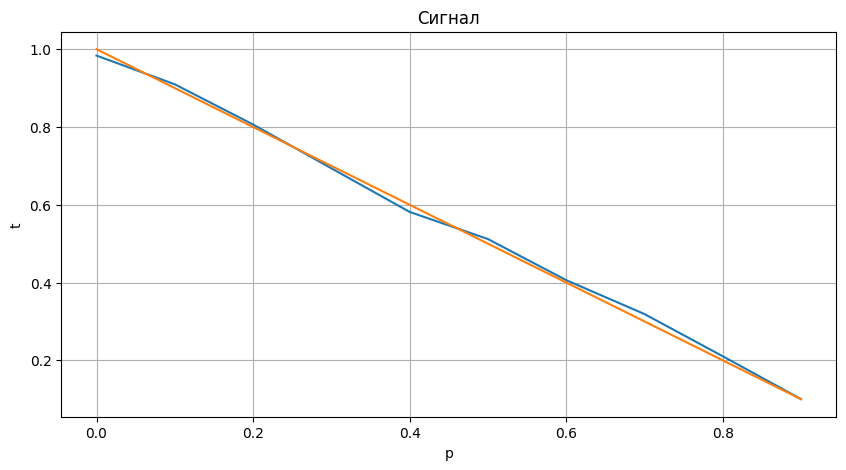

In [15]:
import numpy as np

rr = 0.02 * np.random.uniform(-1, 1, size=10)

plt.figure(figsize=(10, 5))
plt.plot(P_arr, (1 - P_arr + rr ))
plt.plot(P_arr, 1 - P_arr)
plt.title('Сигнал')
plt.xlabel('p')
plt.ylabel('t')
plt.grid(True)

plt.show()